In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

file_path = '/Users/Abraham/iCloud Drive (Archive)/Documents/ML-Python/E_Commerce_Dataset.xlsx'
# Usamos un bloque 'with' para asegurarnos de que el archivo se cierre automáticamente después de cargarlo
with pd.ExcelFile(file_path) as xls:
    Ecomm = pd.read_excel(xls, sheet_name='E Comm')

# Eliminar filas con valores faltantes
Ecomm = Ecomm.dropna()

# Aplicar One-Hot Encoding a las características categóricas
Ecomm_encoded = pd.get_dummies(Ecomm, columns=['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus'])

# Dividir los datos en conjunto de entrenamiento y prueba
X = Ecomm_encoded.drop('Churn', axis=1)
y = Ecomm_encoded['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train_scaled, y_train)

# Evaluar el modelo
y_pred = log_reg_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Interpretar los resultados
coeficientes = log_reg_model.coef_[0]
features = X.columns
coeficientes_df = pd.DataFrame({'Feature': features, 'Coefficient': coeficientes})
coeficientes_df = coeficientes_df.sort_values(by='Coefficient', ascending=False)
print("Coefficients:")
print(coeficientes_df)

Accuracy: 0.9112582781456954
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       648
           1       0.78      0.52      0.63       107

    accuracy                           0.91       755
   macro avg       0.85      0.75      0.79       755
weighted avg       0.90      0.91      0.90       755

Coefficients:
                                  Feature  Coefficient
8                                Complain     0.749364
7                         NumberOfAddress     0.577063
5                NumberOfDeviceRegistered     0.486059
11                             OrderCount     0.484988
6                       SatisfactionScore     0.355568
26               PreferedOrderCat_Fashion     0.345427
3                         WarehouseToHome     0.340632
34                   MaritalStatus_Single     0.294759
31                PreferedOrderCat_Others     0.287817
2                                CityTier     0.254756
22

In [70]:
import pandas as pd 
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

file_path = '/Users/Abraham/iCloud Drive (Archive)/Documents/ML-Python/E_Commerce_Dataset.xlsx'
with pd.ExcelFile(file_path) as xls:
    Ecomm = pd.read_excel(xls, sheet_name='E Comm')

Ecomm = Ecomm.dropna()

In [71]:
Ecomm.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [72]:
y = Ecomm.Churn

In [73]:
features= ['Tenure', 'CityTier', 'WarehouseToHome','HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount']

In [74]:
X = Ecomm[features]

In [75]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [76]:
Ecomm_model = DecisionTreeRegressor()
Ecomm_model.fit(train_X, train_y)

DecisionTreeRegressor()

In [77]:
preds_all_data = Ecomm_model.predict(X)
mae = mean_absolute_error(y, preds_all_data)
accuracy = accuracy_score(y, preds_all_data)
print("MAE:", mae)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y, preds_all_data))

MAE: 0.012718600953895072
Accuracy: 0.9872813990461049
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3143
           1       0.95      0.97      0.96       631

    accuracy                           0.99      3774
   macro avg       0.97      0.98      0.98      3774
weighted avg       0.99      0.99      0.99      3774



In [78]:
import pandas as pd 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Cargar datos
file_path = '/Users/Abraham/iCloud Drive (Archive)/Documents/ML-Python/E_Commerce_Dataset.xlsx'
with pd.ExcelFile(file_path) as xls:
    Ecomm = pd.read_excel(xls, sheet_name='E Comm')

# Eliminar filas con valores nulos
Ecomm = Ecomm.dropna()

# Definir variable objetivo y características
y = Ecomm['Churn']
features = ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
            'NumberOfDeviceRegistered', 'SatisfactionScore', 'Complain',
            'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
            'DaySinceLastOrder', 'CashbackAmount']

X = Ecomm[features]

# Dividir los datos en conjuntos de entrenamiento y validación
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

# Crear y ajustar el modelo de regresión lineal
Ecomm_model = LinearRegression()
Ecomm_model.fit(train_X, train_y)

# Realizar predicciones en el conjunto de validación
preds = Ecomm_model.predict(val_X)

# Evaluar el modelo usando métricas de regresión
mae = mean_absolute_error(val_y, preds)
mse = mean_squared_error(val_y, preds)
r2 = r2_score(val_y, preds)

print("MAE:", mae)
print("MSE:", mse)
print("R^2 Score:", r2)

# Obtener los coeficientes de las características
feature_importances = pd.DataFrame({
    'Feature': features,
    'Coefficient': Ecomm_model.coef_
})

print("Feature Importances:")
print(feature_importances)


MAE: 0.2555093552130247
MSE: 0.11250765018055041
R^2 Score: 0.200736468819396
Feature Importances:
                        Feature  Coefficient
0                        Tenure    -0.014992
1                      CityTier     0.019145
2               WarehouseToHome     0.002791
3                HourSpendOnApp    -0.002242
4      NumberOfDeviceRegistered     0.044326
5             SatisfactionScore     0.030105
6                      Complain     0.197372
7   OrderAmountHikeFromlastYear     0.001524
8                    CouponUsed     0.002364
9                    OrderCount     0.010653
10            DaySinceLastOrder    -0.013687
11               CashbackAmount    -0.000071


MAE: 0.1271186440677966
Accuracy: 0.8728813559322034
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       784
           1       0.70      0.43      0.53       160

    accuracy                           0.87       944
   macro avg       0.80      0.70      0.73       944
weighted avg       0.86      0.87      0.86       944

Confusion Matrix:
[[755  29]
 [ 91  69]]
ROC AUC Score: 0.8506616709183674
Feature Importances:
                        Feature  Coefficient
0                        Tenure    -0.220745
1                      CityTier     0.138527
2               WarehouseToHome     0.025745
3                HourSpendOnApp    -0.024831
4      NumberOfDeviceRegistered     0.376608
5             SatisfactionScore     0.286196
6                      Complain     1.477658
7   OrderAmountHikeFromlastYear     0.007573
8                    CouponUsed    -0.004276
9                    OrderCount     0.161365
10    

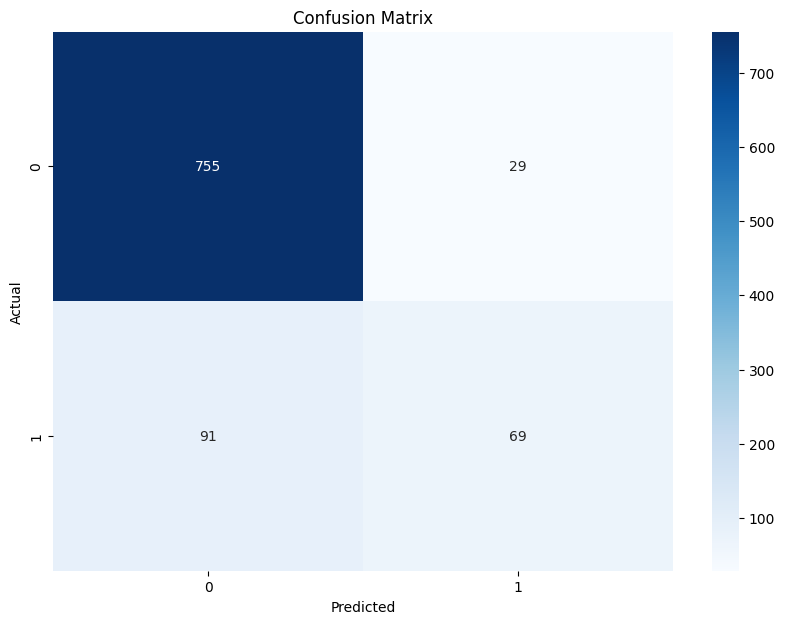

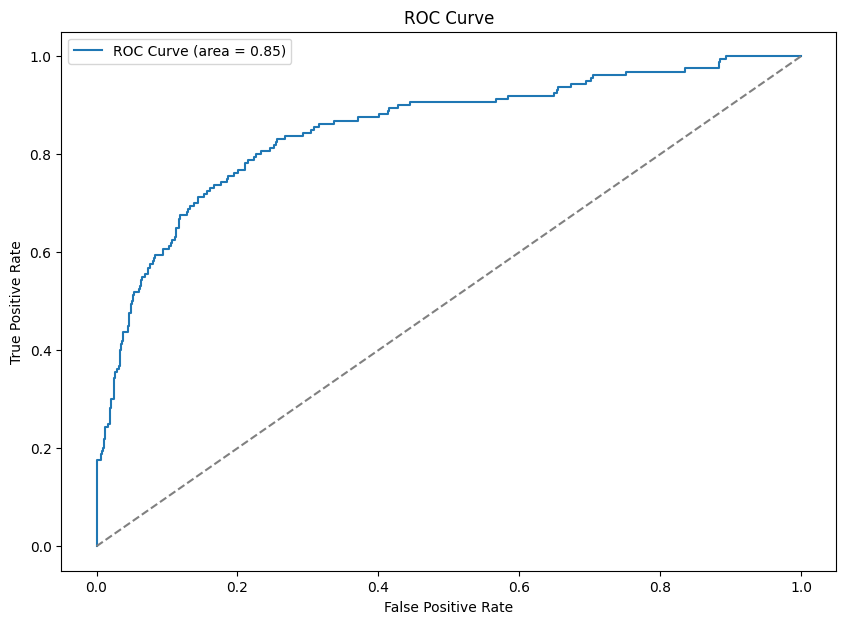

In [79]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
file_path = '/Users/Abraham/iCloud Drive (Archive)/Documents/ML-Python/E_Commerce_Dataset.xlsx'
with pd.ExcelFile(file_path) as xls:
    Ecomm = pd.read_excel(xls, sheet_name='E Comm')

# Eliminar filas con valores nulos
Ecomm = Ecomm.dropna()

# Definir variable objetivo y características
y = Ecomm['Churn']
features = ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
            'NumberOfDeviceRegistered', 'SatisfactionScore', 'Complain',
            'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
            'DaySinceLastOrder', 'CashbackAmount']

X = Ecomm[features]

# Dividir los datos en conjuntos de entrenamiento y validación
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

# Crear y ajustar el modelo de regresión logística
Ecomm_model = LogisticRegression(max_iter=1000)
Ecomm_model.fit(train_X, train_y)

# Realizar predicciones en el conjunto de validación
preds = Ecomm_model.predict(val_X)

# Evaluar el modelo usando métricas de clasificación
mae = mean_absolute_error(val_y, preds)
accuracy = accuracy_score(val_y, preds)
classification_rep = classification_report(val_y, preds)
conf_matrix = confusion_matrix(val_y, preds)
roc_auc = roc_auc_score(val_y, Ecomm_model.predict_proba(val_X)[:, 1])

print("MAE:", mae)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)

print("Confusion Matrix:")
print(conf_matrix)

print("ROC AUC Score:", roc_auc)

# Obtener los coeficientes de las características
feature_importances = pd.DataFrame({
    'Feature': features,
    'Coefficient': Ecomm_model.coef_[0]
})

print("Feature Importances:")
print(feature_importances)

# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Graficar la curva ROC
fpr, tpr, thresholds = roc_curve(val_y, Ecomm_model.predict_proba(val_X)[:, 1])
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [81]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Cargar el archivo de Excel
file_path = '/Users/Abraham/iCloud Drive (Archive)/Documents/ML-Python/E_Commerce_Dataset.xlsx'
with pd.ExcelFile(file_path) as xls:
    Ecomm = pd.read_excel(xls, sheet_name='E Comm')

# Selección de características
y = Ecomm['Churn']
features = ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
            'NumberOfDeviceRegistered', 'SatisfactionScore', 'Complain',
            'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
            'DaySinceLastOrder', 'CashbackAmount']
X = Ecomm[features]

# Imputar los valores faltantes
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y validación
train_X, val_X, train_y, val_y = train_test_split(X_imputed, y, random_state=0)

# Crear y entrenar el modelo
Ecomm_model = DecisionTreeRegressor()
Ecomm_model.fit(train_X, train_y)

# Hacer predicciones en el conjunto de datos completo
preds_all_data = Ecomm_model.predict(X_imputed)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y, preds_all_data)
print("MAE:", mae)

# Calcular el coeficiente de determinación R^2
r2 = r2_score(y, preds_all_data)
print("R^2 Score:", r2)


MAE: 0.020071047957371226
R^2 Score: 0.8566667027145888

Importancia de las características:
                        Feature  Importance
0                        Tenure    0.294525
1                      CityTier    0.030365
2               WarehouseToHome    0.108146
3                HourSpendOnApp    0.016370
4      NumberOfDeviceRegistered    0.035391
5             SatisfactionScore    0.057918
6                      Complain    0.065926
7   OrderAmountHikeFromlastYear    0.084780
8                    CouponUsed    0.015871
9                    OrderCount    0.033108
10            DaySinceLastOrder    0.080577
11               CashbackAmount    0.177022


In [104]:
"""
Ejercicio de Regresión para Entrevista de Trabajo
Fecha: 7 de Junio de 2024
Autor: Rodolfo Abraham Sánchez Isidro
Propósito: Este script entrena un modelo de regresión de árbol de decisión para predecir la tasa de abandono en una empresa de comercio electrónico y muestra la importancia de las características.

"""

# Importar bibliotecas necesarias
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Cargar el archivo de Excel
file_path = '/Users/Abraham/iCloud Drive (Archive)/Documents/ML-Python/E_Commerce_Dataset.xlsx'
with pd.ExcelFile(file_path) as xls:
    Ecomm = pd.read_excel(xls, sheet_name='E Comm')

# Selección de características
y = Ecomm['Churn']

# Eliminar las columnas 'CustomerID' y 'Churn' del conjunto de características
features_to_encode = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender',
                      'PreferedOrderCat', 'MaritalStatus']

# Selección de características numéricas
numeric_features = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
                    'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
                    'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

# Obtener las características numéricas
X_numeric = Ecomm[numeric_features]

# Obtener las características categóricas y realizar codificación one-hot
X_categorical = pd.get_dummies(Ecomm[features_to_encode])

# Combinar características numéricas y categóricas codificadas one-hot
X_encoded = pd.concat([X_numeric, X_categorical], axis=1)

# Imputar los valores faltantes
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_encoded)

# Dividir los datos en conjuntos de entrenamiento y validación
train_X, val_X, train_y, val_y = train_test_split(X_imputed, y, random_state=0)

# Crear y entrenar el modelo
Ecomm_model = DecisionTreeRegressor()
Ecomm_model.fit(train_X, train_y)

# Hacer predicciones en el conjunto de datos completo
preds_all_data = Ecomm_model.predict(X_imputed)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y, preds_all_data)

# Calcular el coeficiente de determinación R^2
r2 = r2_score(y, preds_all_data)

# Mostrar los resultados
print("Resultados del Modelo:")
print("---------------------")
print(f"Error absoluto medio (MAE): {mae:.2f}")
print(f"Coeficiente de determinación R^2: {r2:.2f}")
print("\nImportancia de las Características:")
print("----------------------------------")
print(pd.DataFrame({'Feature': X_encoded.columns, 'Importance': Ecomm_model.feature_importances_}))


Resultados del Modelo:
---------------------
Error absoluto medio (MAE): 0.01
Coeficiente de determinación R^2: 0.90

Importancia de las Características:
----------------------------------
                                  Feature  Importance
0                                  Tenure    0.274759
1                         WarehouseToHome    0.056463
2                          HourSpendOnApp    0.012994
3                NumberOfDeviceRegistered    0.034576
4                       SatisfactionScore    0.054470
5                         NumberOfAddress    0.067698
6                                Complain    0.065926
7             OrderAmountHikeFromlastYear    0.053910
8                              CouponUsed    0.004910
9                              OrderCount    0.017739
10                      DaySinceLastOrder    0.073874
11                         CashbackAmount    0.086889
12                               CityTier    0.032278
13          PreferredLoginDevice_Computer    0.006157
1